## Import the important Libraries

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns



## Load Dataset

https://www.kaggle.com/datasets/gauravkumar2525/email-spam-classification-cleaned-and-feature-rich?resource=download

In [33]:

dataset_path = '/content/email classification cleaned dataset.csv'
df = pd.read_csv(dataset_path)

# Display the first 5 rows of the dataframe
display(df.head())

# Display the column names and their data types
display(df.info())

,id,label,subject,sender_domain,has_url,email_length,word_count,char_count,digit_count,uppercase_words,...,has_free,has_win,has_winner,has_click,has_offer,has_urgent,has_limited,has_buy,has_now,has_money
0,2685,0,Regarding Your Recent Inquiry,legitcompany.com,0,253,37,205,2,0,...,0,0,0,0,0,0,0,0,0,0
1,5857,0,Weekly Newsletter - Latest Updates,softwareupdates.com,0,290,44,231,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2399,0,Important: Software Update Notification,softwareupdates.com,0,269,38,213,5,0,...,0,0,0,0,0,0,0,0,0,0
3,3244,0,Team Stand-up at 10 AM,customerservice.co,0,274,44,213,2,2,...,0,0,0,0,0,0,0,0,0,0
4,2844,0,Team Stand-up at 10 AM,customerservice.co,0,241,40,179,4,1,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   label            10000 non-null  int64  
 2   subject          10000 non-null  object 
 3   sender_domain    10000 non-null  object 
 4   has_url          10000 non-null  int64  
 5   email_length     10000 non-null  int64  
 6   word_count       10000 non-null  int64  
 7   char_count       10000 non-null  int64  
 8   digit_count      10000 non-null  int64  
 9   uppercase_words  10000 non-null  int64  
 10  exclamations     10000 non-null  int64  
 11  avg_word_length  10000 non-null  float64
 12  punc_ratio       10000 non-null  float64
 13  has_noreply      10000 non-null  int64  
 14  has_free         10000 non-null  int64  
 15  has_win          10000 non-null  int64  
 16  has_winner       10000 non-null  int64  
 17  has_click    

None

## Data preprocessing


In [34]:


# Identify categorical and numerical columns
categorical_cols = ['subject', 'sender_domain']
numerical_cols = ['email_length', 'word_count', 'char_count', 'digit_count',
                  'uppercase_words', 'exclamations', 'avg_word_length', 'punc_ratio']

# Apply one-hot encoding to categorical columns
# Limit the number of unique values to avoid excessive columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Instantiate and fit the StandardScaler
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the processed dataframe
display(df_encoded.head())

# Display the column names and their data types of the processed dataframe
display(df_encoded.info())

,id,label,has_url,email_length,word_count,char_count,digit_count,uppercase_words,exclamations,avg_word_length,...,sender_domain_legitcompany.com,sender_domain_media-boost.online,sender_domain_package-update.info,sender_domain_personalmail.net,sender_domain_projectmanagement.com,sender_domain_retailfeedback.com,sender_domain_secure-login.com,sender_domain_softwareupdates.com,sender_domain_unclaimed-funds.co,sender_domain_winner-prize.net
0,2685,0,0,0.160331,-0.017380,0.313688,0.026987,-0.628590,-0.682495,0.353793,...,True,False,False,False,False,False,False,False,False,False
1,5857,0,0,1.122861,1.154697,1.087851,-0.901998,0.822784,-0.682495,-0.206921,...,False,False,False,False,False,False,False,True,False,False
2,2399,0,0,0.576560,0.150059,0.551892,1.420464,-0.628590,-0.682495,0.901294,...,False,False,False,False,False,False,False,True,False,False
3,3244,0,0,0.706632,1.154697,0.551892,0.026987,2.274157,-0.682495,-1.032650,...,False,False,False,False,False,False,False,False,False,False
4,2844,0,0,-0.151840,0.484938,-0.460475,0.955972,0.822784,-0.682495,-1.491962,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        10000 non-null  int64  
 1   label                                                     10000 non-null  int64  
 2   has_url                                                   10000 non-null  int64  
 3   email_length                                              10000 non-null  float64
 4   word_count                                                10000 non-null  float64
 5   char_count                                                10000 non-null  float64
 6   digit_count                                               10000 non-null  float64
 7   uppercase_words                                           10000 non-null  float64
 8   exclamations     

None

## Split data



In [35]:


X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 59)
Shape of X_test: (2000, 59)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


## Implement logistic regression


In [36]:


# Instantiate a LogisticRegression model with default parameters
model = LogisticRegression()

# Train the logistic regression model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate model


In [37]:


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


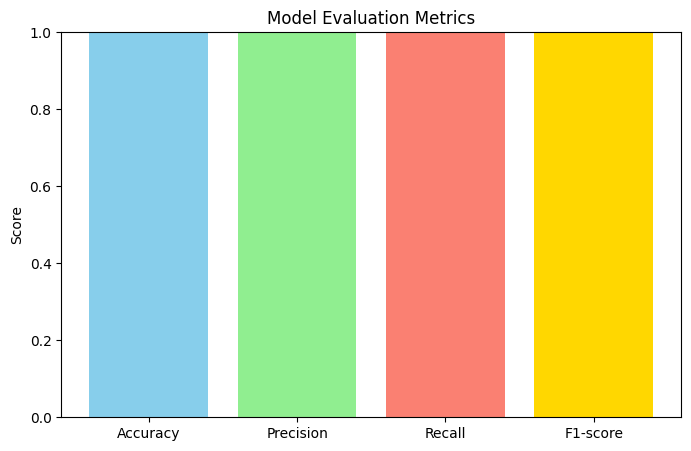

In [38]:


# Assuming accuracy, precision, recall, and f1 are already calculated
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

## Generate visualizations


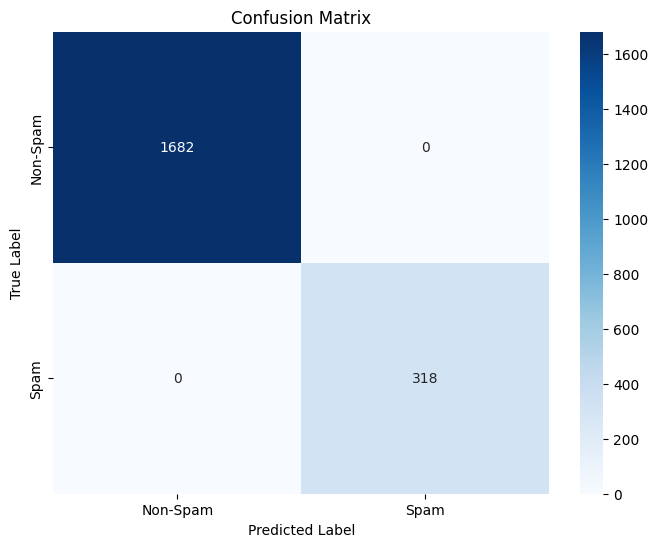

In [39]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize spam vs. not spam

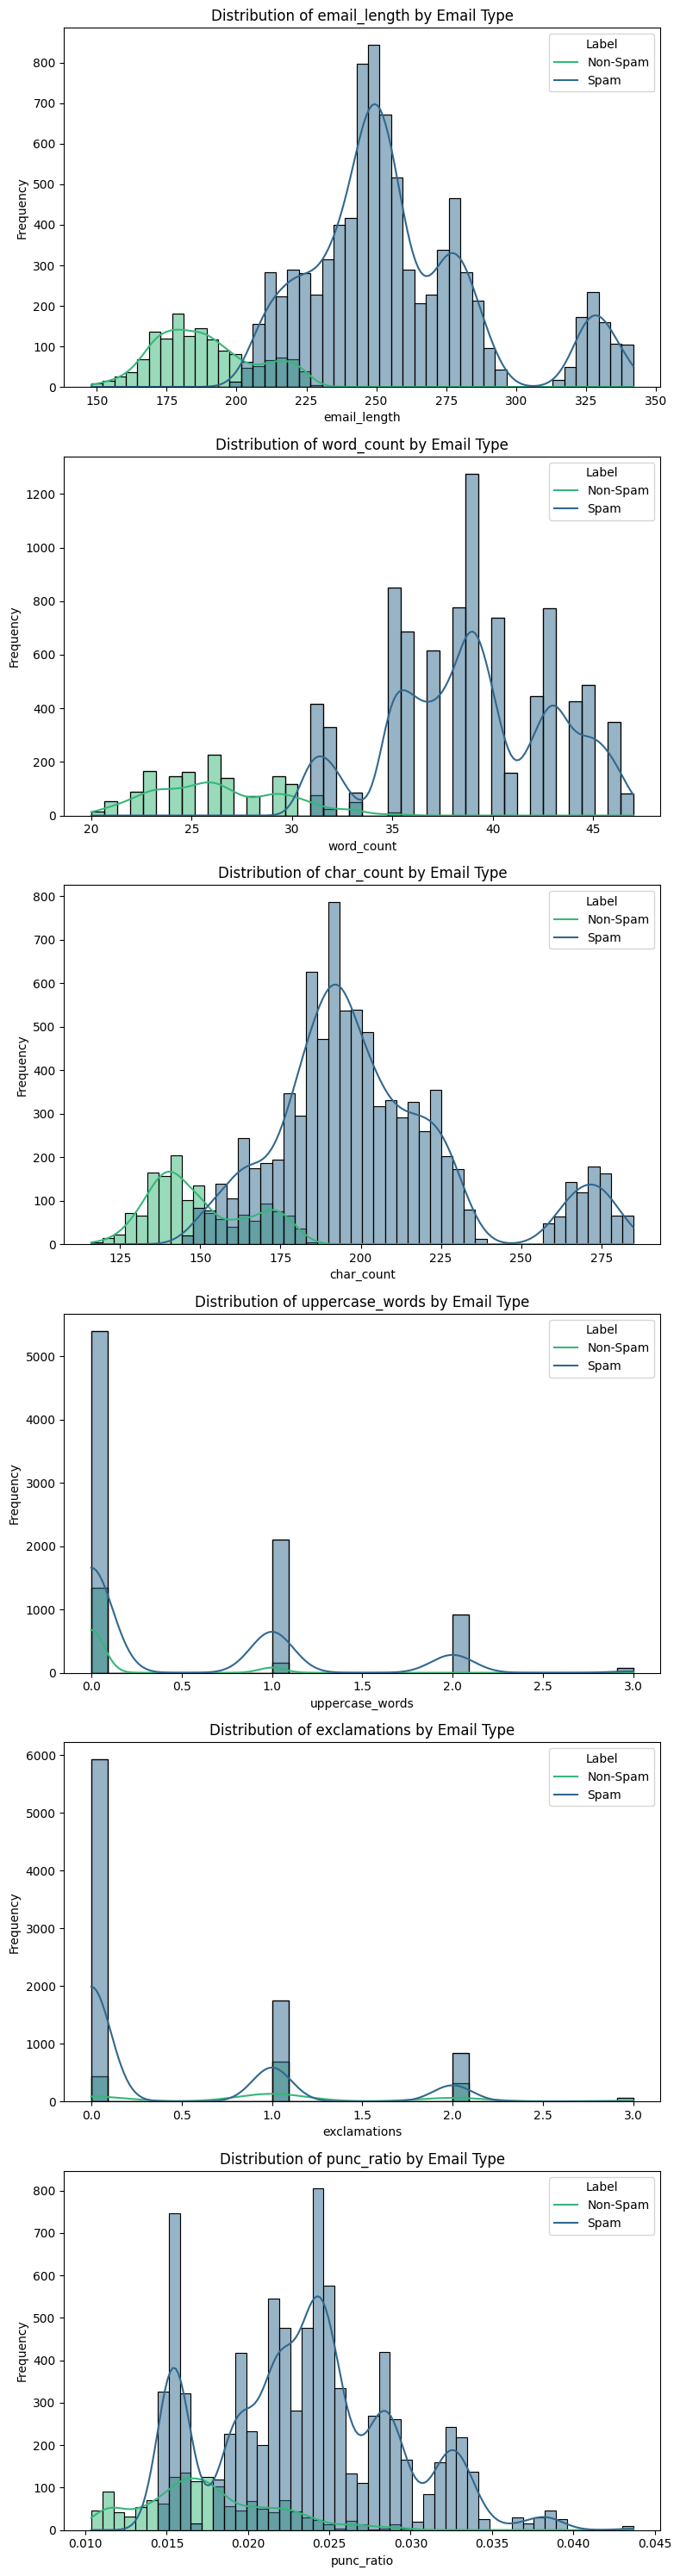

In [40]:


selected_features = ['email_length', 'word_count', 'char_count', 'uppercase_words', 'exclamations', 'punc_ratio']

# Set up the figure and axes for multiple plots
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(8, 5 * len(selected_features)))

for i, feature in enumerate(selected_features):
    sns.histplot(data=df, x=feature, hue='label', ax=axes[i], kde=True, palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Email Type')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Label', labels=['Non-Spam', 'Spam'])

plt.tight_layout()
plt.show()

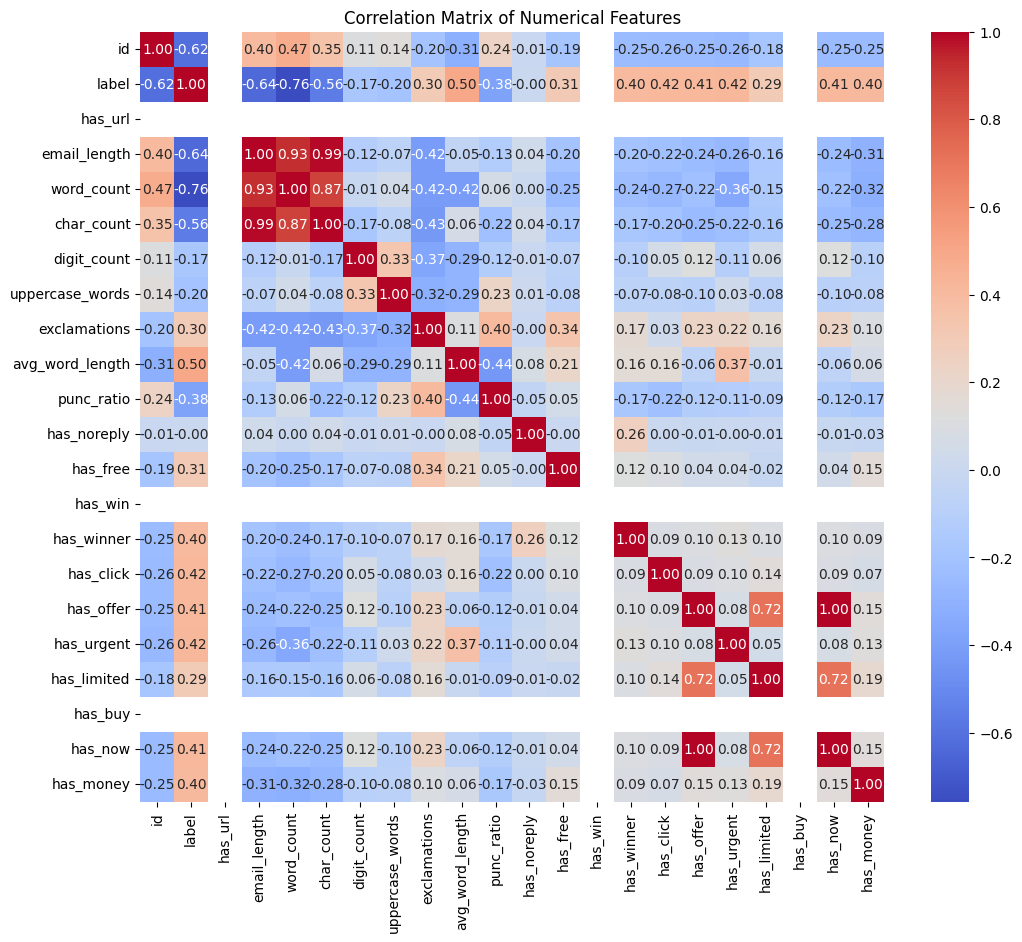

In [41]:


# Select only numerical columns for correlation analysis, including the 'label'
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()